# Khám phá dữ liệu trên tập dữ liệu về bệnh tiểu đường

## 0. Import các thư viện

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
from scipy import stats


## 1. Chuẩn bị dữ liệu

In [3]:
import pandas as pd 
diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data = diabetes_data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]


In [4]:
display(diabetes_data.head(10).style.background_gradient(cmap='Greens'))


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
5,5,116,74,0,0,25.600000,0.201000,30,0
6,3,78,50,32,88,31.000000,0.248000,26,1
7,10,115,0,0,0,35.300000,0.134000,29,0
8,2,197,70,45,543,30.500000,0.158000,53,1
9,8,125,96,0,0,0.000000,0.232000,54,1


### 2. Kiểm tra dữ liệu và định dạng 

### 2.1. Kiểm tra dữ liệu trùng lặp

In [5]:
duplicate_count = diabetes_data.duplicated().sum()
print(f"Số dòng bị trùng lặp: {duplicate_count}")

# Hiển thị các dòng bị trùng lặp
duplicated_rows = diabetes_data[diabetes_data.duplicated(keep=False)]
print("Các dòng bị trùng lặp:")
display(duplicated_rows)


Số dòng bị trùng lặp: 0
Các dòng bị trùng lặp:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### 2.2. Kiểm tra dữ liệu bị thiếu 

In [6]:
missing_info = diabetes_data.isnull().sum()
missing_info
missing_percentage = (missing_info / len(diabetes_data)) * 100
missing_percentage


Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

### 2.3. Kiểm tra định dạng dữ liệu

In [7]:
diabetes_data_info = diabetes_data.dtypes
diabetes_data_info


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Tới đây, ta nhận thấy định dạng dữ liệu của tập dữ liệu không đồng nhất, nên ta sẽ đưa tất cả về cùng 1 định dạng là float64

In [8]:
diabetes_data = diabetes_data.astype('float64')


Kiểm tra lại, ta được tập dữ liệu đồng nhất định dạng như sau:

In [9]:
diabetes_data_info = diabetes_data.dtypes
diabetes_data_info


Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

## 3. Thông tin đặc tả và thống kê mô tả

### 3.1. Thông tin đặc tả

Bộ dữ liệu này có 768 dòng, 9 cột

In [10]:
num_rows, num_cols = diabetes_data.shape
print(f"Số dòng của bộ dữ liệu: {num_rows}")
print(f"Số cột của bộ dữ liệu: {num_cols}")


Số dòng của bộ dữ liệu: 768
Số cột của bộ dữ liệu: 9


Thông tin mô tả của các cột
- **Pregnancies**: Số lần mang thai mà bệnh nhân đã từng trải qua. Đây là một yếu tố nguy cơ liên quan đến bệnh tiểu đường, đặc biệt là tiểu đường thai kỳ.
- **Glucose**: Nồng độ glucose (đường) trong máu lúc đói, đo bằng đơn vị mg/dL. Giá trị này phản ánh khả năng chuyển hóa đường của cơ thể.
- **BloodPressure**: Huyết áp tâm trương (mm Hg) đo được tại thời điểm khám. Huyết áp cao có thể liên quan đến nguy cơ mắc bệnh tiểu đường.
- **SkinThickness**: Độ dày nếp gấp da dưới cánh tay (mm), phản ánh lượng mỡ dưới da. Chỉ số này giúp đánh giá tình trạng béo phì.
- **Insulin**: Nồng độ insulin trong máu lúc đói (mu U/ml). Insulin là hormone điều hòa lượng đường huyết, giá trị này giúp đánh giá chức năng tuyến tụy.
- **BMI**: Chỉ số khối cơ thể (Body Mass Index), tính bằng kg/m². BMI cao là yếu tố nguy cơ của bệnh tiểu đường.
- **DiabetesPedigreeFunction**: Chỉ số phả hệ tiểu đường, phản ánh khả năng di truyền bệnh tiểu đường dựa trên lịch sử gia đình.
- **Age**: Tuổi của bệnh nhân (năm). Tuổi cao thường đi kèm với nguy cơ mắc bệnh tiểu đường tăng lên.
- **Outcome**: Kết quả chẩn đoán bệnh tiểu đường (1: mắc bệnh, 0: không mắc bệnh). Đây là biến mục tiêu của bài toán.


### 3.2. Thống kê mô tả

Thống kê các số liệu đặc trưng để mô tả chung bộ dữ liệu:

In [11]:
# Tính toán các thống kê mô tả cho từng cột số liệu
desc_stats = {}

for col in diabetes_data.columns:
    if diabetes_data[col].dtype in [np.float64, np.int64]:
        data = diabetes_data[col].values

        mean = np.mean(data)
        median = np.median(data)
        mode = stats.mode(data, keepdims=True)[0][0]
        var = np.var(data, ddof=1)
        std = np.std(data, ddof=1)
        data_range = np.ptp(data)
        percentile_25 = np.percentile(data, 25)
        percentile_50 = np.percentile(data, 50)
        percentile_75 = np.percentile(data, 75)
        iqr = stats.iqr(data)
        
        desc_stats[col] = {
            'mean': mean,
            'median': median,
            'mode': mode,
            'variance': var,
            'std_dev': std,
            'range': data_range,
            'percentile_25': percentile_25,
            'percentile_50': percentile_50,
            'percentile_75': percentile_75,
            'iqr': iqr
        }

desc_stats_df = pd.DataFrame(desc_stats).T
desc_stats_df


,mean,median,mode,variance,std_dev,range,percentile_25,percentile_50,percentile_75,iqr
Pregnancies,3.845052,3.0000,1.000,11.354056,3.369578,17.000,1.00000,3.0000,6.00000,5.0000
Glucose,120.894531,117.0000,99.000,1022.248314,31.972618,199.000,99.00000,117.0000,140.25000,41.2500
BloodPressure,69.105469,72.0000,70.000,374.647271,19.355807,122.000,62.00000,72.0000,80.00000,18.0000
SkinThickness,20.536458,23.0000,0.000,254.473245,15.952218,99.000,0.00000,23.0000,32.00000,32.0000
Insulin,79.799479,30.5000,0.000,13281.180078,115.244002,846.000,0.00000,30.5000,127.25000,127.2500
BMI,31.992578,32.0000,32.000,62.159984,7.884160,67.100,27.30000,32.0000,36.60000,9.3000
DiabetesPedigreeFunction,0.471876,0.3725,0.254,0.109779,0.331329,2.342,0.24375,0.3725,0.62625,0.3825
Age,33.240885,29.0000,22.000,138.303046,11.760232,60.000,24.00000,29.0000,41.00000,17.0000
Outcome,0.348958,0.0000,0.000,0.227483,0.476951,1.000,0.00000,0.0000,1.00000,1.0000


## 4. Kiểm tra dữ liệu bất hợp lý

Chúng ta sẽ kiểm tra các bộ dữ liệu trên tập dữ liệu để tìm ra bộ dữ liệu không hợp lý (BMI = 0, Glucose = 0,...)

In [12]:
# Kiểm tra các dòng có giá trị bất hợp lý (BMI = 0, Glucose = 0, BloodPressure = 0, SkinThickness = 0, Insulin = 0)
unreasonable_rows = diabetes_data[
    (diabetes_data['BMI'] == 0) |
    (diabetes_data['Glucose'] == 0) |
    (diabetes_data['BloodPressure'] == 0) |
    (diabetes_data['SkinThickness'] == 0) |
    (diabetes_data['Insulin'] == 0)
]

print(f"Số dòng có giá trị bất hợp lý: {len(unreasonable_rows)}")
display(unreasonable_rows)


Số dòng có giá trị bất hợp lý: 376


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0.0
...,...,...,...,...,...,...,...,...,...
761,9.0,170.0,74.0,31.0,0.0,44.0,0.403,43.0,1.0
762,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


Tiếp theo chúng ta sẽ xử lý các dòng dữ liệu bất hợp lý này

In [13]:
# Thay thế giá trị 0 ở các cột y tế bằng NaN
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[cols_to_replace] = diabetes_data[cols_to_replace].replace(0, np.nan)

# Xử lý: điền bằng trung vị (median) của từng cột
for col in cols_to_replace:
    median_value = diabetes_data[col].median()
    diabetes_data[col] = diabetes_data[col].fillna(median_value)


Sau đó, ta sẽ kiểm tra lại một lần nữa các dòng dữ liệu đã xử lý này

In [14]:
# Kiểm tra lại các dòng dữ liệu bất hợp lý sau khi đã xử lý (không còn giá trị 0 ở các cột y tế)
unreasonable_rows_after = diabetes_data[
    (diabetes_data['BMI'] == 0) |
    (diabetes_data['Glucose'] == 0) |
    (diabetes_data['BloodPressure'] == 0) |
    (diabetes_data['SkinThickness'] == 0) |
    (diabetes_data['Insulin'] == 0)
]

print(f"Số dòng có giá trị bất hợp lý sau xử lý: {len(unreasonable_rows_after)}")
display(unreasonable_rows_after)


Số dòng có giá trị bất hợp lý sau xử lý: 0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Như vậy là chúng ta đã xử lý xong các bộ dữ liệu bất hợp lý

## 5. Thông kê mô tả đơn biến 

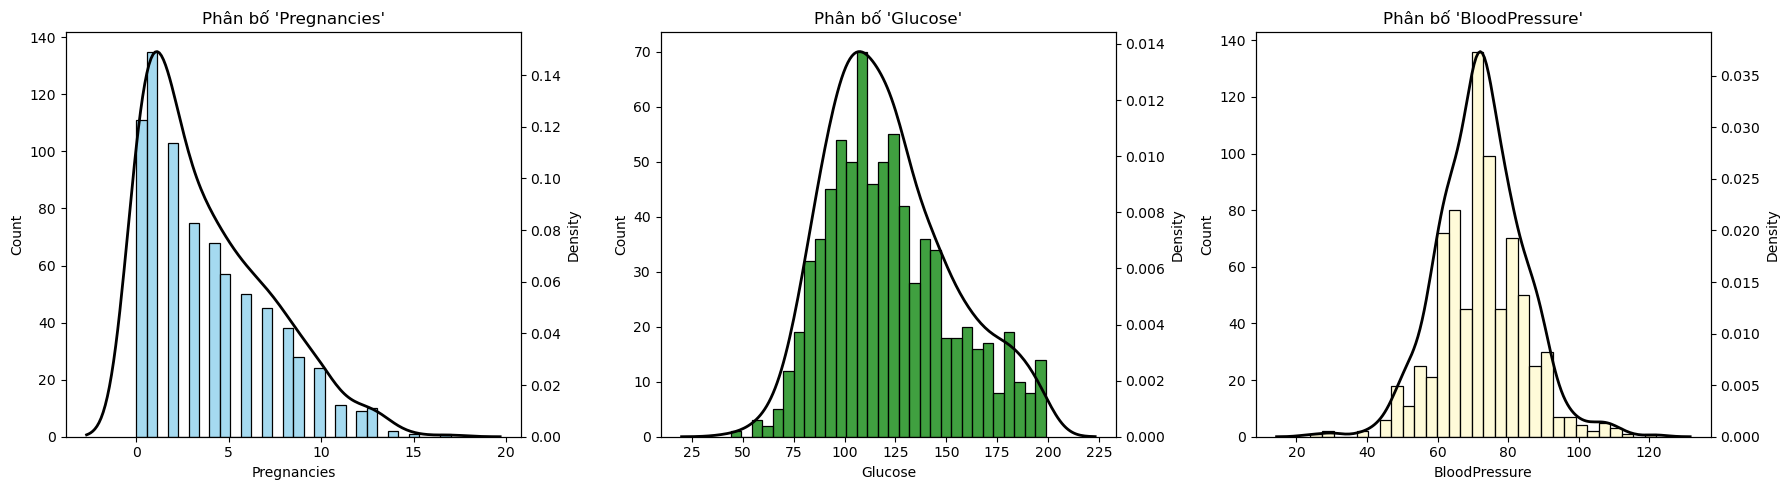

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

features = ['Pregnancies', 'Glucose', 'BloodPressure']
colors = ['skyblue', 'green', 'lemonchiffon']

for ax, feature, color in zip(axes, features, colors):
    sns.histplot(diabetes_data[feature], bins=30, kde=False, color=color, ax=ax)
    ax2 = ax.twinx()
    sns.kdeplot(diabetes_data[feature], color='black', ax=ax2, linewidth=2)
    ax.set_title(f"Phân bố '{feature}'")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax2.set_ylabel("Density")

plt.tight_layout()
plt.show()


Các biểu đồ phân phối của ba thuộc tính Pregnancies, Glucose và BloodPressure cho thấy:

- **Pregnancies**: Phân phối lệch phải, đa số bệnh nhân có số lần mang thai thấp (1-3 lần), số lượng bệnh nhân có nhiều lần mang thai giảm dần khi số lần tăng lên.
- **Glucose**: Phân phối gần chuẩn nhưng hơi lệch phải, phần lớn bệnh nhân có mức glucose tập trung quanh giá trị trung bình (~100-140 mg/dL), tuy nhiên vẫn có một số trường hợp giá trị cao bất thường.
- **BloodPressure**: Phân phối khá đều, tập trung chủ yếu ở khoảng 60-80 mmHg, ít trường hợp có huyết áp tâm trương quá thấp hoặc quá cao.

Nhìn chung, các thuộc tính này đều có xu hướng tập trung quanh một giá trị trung bình, nhưng vẫn tồn tại các giá trị ngoại lai và phân phối không hoàn toàn đối xứng. Điều này phản ánh sự đa dạng về đặc điểm sinh lý của bệnh nhân trong tập dữ liệu.

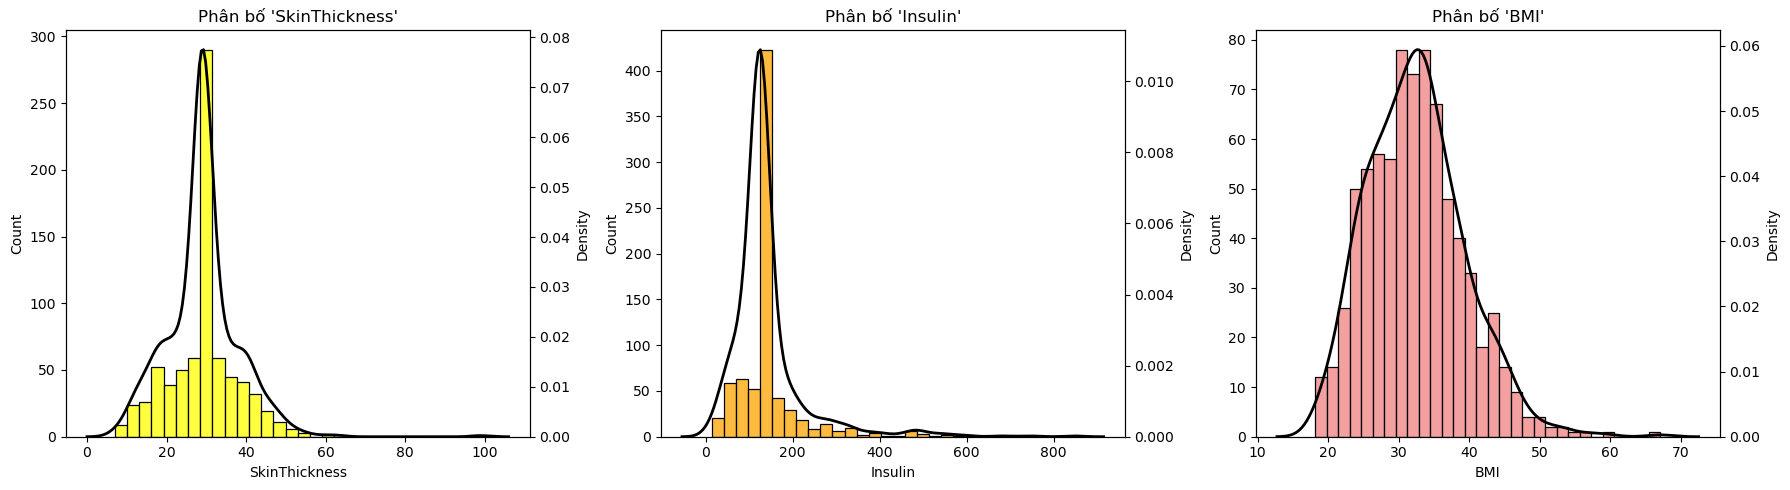

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

features = ['SkinThickness', 'Insulin', 'BMI']
colors = ['yellow', 'orange', 'lightcoral']

for ax, feature, color in zip(axes, features, colors):
    sns.histplot(diabetes_data[feature], bins=30, kde=False, color=color, ax=ax)
    ax2 = ax.twinx()
    sns.kdeplot(diabetes_data[feature], color='black', ax=ax2, linewidth=2)
    ax.set_title(f"Phân bố '{feature}'")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax2.set_ylabel("Density")

plt.tight_layout()
plt.show()


Các biểu đồ phân phối của ba thuộc tính SkinThickness, Insulin và BMI cho thấy:

- **SkinThickness**: Phân phối lệch phải, nhiều giá trị tập trung ở mức thấp (gần 0), số lượng bệnh nhân có độ dày nếp gấp da cao giảm dần khi giá trị tăng lên. Điều này phản ánh đa số bệnh nhân có lượng mỡ dưới da ở mức vừa phải hoặc thấp.

- **Insulin**: Phân phối lệch phải rõ rệt, phần lớn bệnh nhân có nồng độ insulin thấp, chỉ một số ít có giá trị cao bất thường. Điều này cho thấy sự đa dạng về chức năng tuyến tụy và khả năng điều hòa đường huyết trong cộng đồng bệnh nhân.

- **BMI**: Phân phối gần chuẩn, tập trung chủ yếu quanh giá trị trung bình (~32), số lượng bệnh nhân có BMI quá thấp hoặc quá cao không nhiều. Điều này phản ánh phần lớn bệnh nhân có chỉ số khối cơ thể ở mức trung bình đến hơi cao, phù hợp với đặc điểm nguy cơ của bệnh tiểu đường.

Nhìn chung, các thuộc tính này đều có xu hướng tập trung quanh một giá trị trung bình, nhưng vẫn tồn tại các giá trị ngoại lai và phân phối không hoàn toàn đối xứng. Điều này phản ánh sự đa dạng về đặc điểm sinh lý của bệnh nhân trong tập dữ liệu.

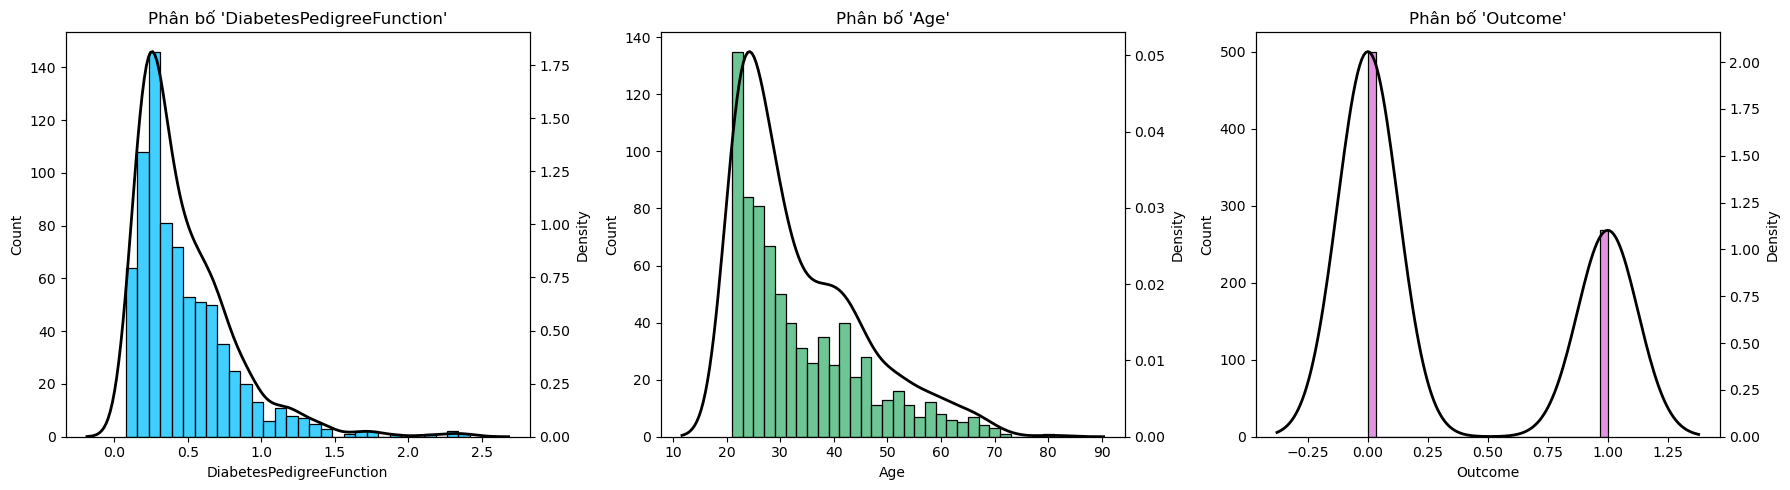

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

features = ['DiabetesPedigreeFunction', 'Age', 'Outcome']
colors = ['deepskyblue', 'mediumseagreen', 'orchid']

for ax, feature, color in zip(axes, features, colors):
    sns.histplot(diabetes_data[feature], bins=30, kde=False, color=color, ax=ax)
    ax2 = ax.twinx()
    sns.kdeplot(diabetes_data[feature], color='black', ax=ax2, linewidth=2)
    ax.set_title(f"Phân bố '{feature}'")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax2.set_ylabel("Density")

plt.tight_layout()
plt.show()


Nhận xét phân phối của các thuộc tính DiabetesPedigreeFunction, Age, Outcome:

- **DiabetesPedigreeFunction**: Phân phối lệch phải, đa số bệnh nhân có chỉ số phả hệ tiểu đường thấp, số lượng bệnh nhân có chỉ số cao giảm dần khi giá trị tăng lên. Điều này phản ánh phần lớn bệnh nhân không có yếu tố di truyền mạnh về bệnh tiểu đường.

- **Age**: Phân phối lệch phải nhẹ, phần lớn bệnh nhân tập trung ở nhóm tuổi trẻ và trung niên (20-40 tuổi), số lượng bệnh nhân lớn tuổi giảm dần khi tuổi tăng lên. Điều này phù hợp với thực tế nguy cơ mắc bệnh tiểu đường tăng theo tuổi.

- **Outcome**: Là biến nhị phân, phân phối không đều với tỷ lệ bệnh nhân không mắc bệnh (giá trị 0) cao hơn so với bệnh nhân mắc bệnh (giá trị 1). Điều này cho thấy trong tập dữ liệu, số lượng bệnh nhân không mắc tiểu đường chiếm ưu thế.

Nhìn chung, các thuộc tính này đều có xu hướng tập trung ở giá trị thấp, riêng Outcome thể hiện rõ sự mất cân bằng giữa hai nhóm bệnh và không bệnh. Phân phối của các thuộc tính này phản ánh đặc điểm dịch tễ học của bệnh tiểu đường trong cộng đồng.

## 6. Phân tích đa biến

Trong phần này, chúng ta sẽ phân tích mối tương quan giữa các thông số thuộc tính sức khỏe với kết quả chuẩn đoán mắc bệnh, để tìm ra các phát hiện quan trọng và xử lý những trường hợp mâu thuẫn nhau giữa các chỉ số với kết quả chuẩn đoán ban đầu

### 6.1. Phân tích nhị biến

Ở đây, ta quan tâm đến mối quan hệ giữa từng đặc trưng và biến mục tiêu Outcome (0 = không mắc, 1 = mắc). Các chỉ số quan trọng để so sánh:
* Glucose: Người mắc tiểu đường thường có mức đường huyết cao hơn
* BMI: Chỉ số khối cơ thể cao thường liên quan đến nguy cơ tiểu đường.
* Age: Tuổi cao dễ có khả năng mắc tiểu đường hơn.
* Insulin (nếu dữ liệu sạch, loại bỏ giá trị 0): liên quan trực tiếp đến khả năng chuyển hóa đường.

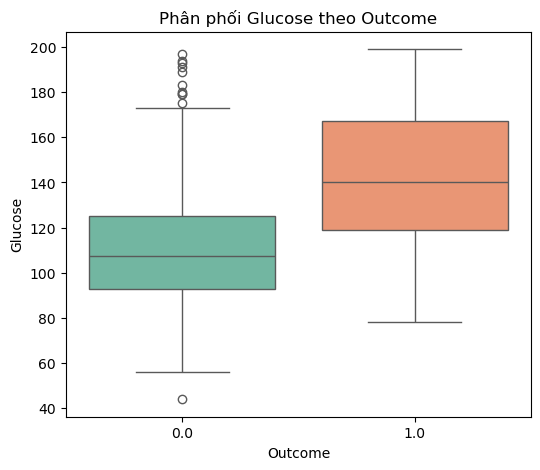

In [18]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Outcome", y="Glucose", data=diabetes_data, palette="Set2")
plt.title("Phân phối Glucose theo Outcome")
plt.show()


Nhận xét:
- Nhóm có Outcome = 1 (mắc tiểu đường) thường có mức Glucose cao hơn hẳn so với nhóm không mắc.
- Phân phối lệch rõ rệt, cho thấy Glucose là biến quan trọng trong phân loại.

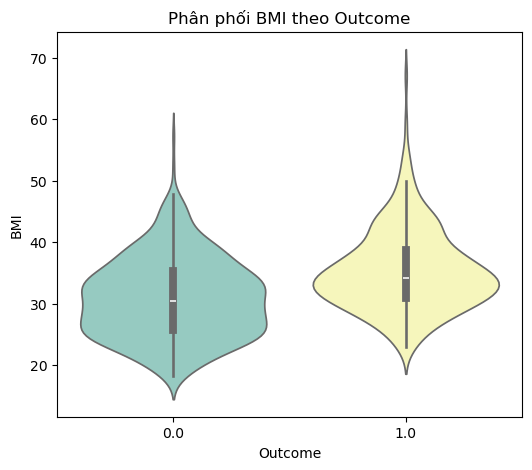

In [19]:
plt.figure(figsize=(6,5))
sns.violinplot(x="Outcome", y="BMI", data=diabetes_data, palette="Set3")
plt.title("Phân phối BMI theo Outcome")
plt.show()


Nhận xét:
- Nhóm mắc tiểu đường có xu hướng BMI cao hơn.
- Dù có sự chồng lấn, mật độ phân phối cho thấy BMI > 30 thường gặp ở nhóm Outcome = 1.

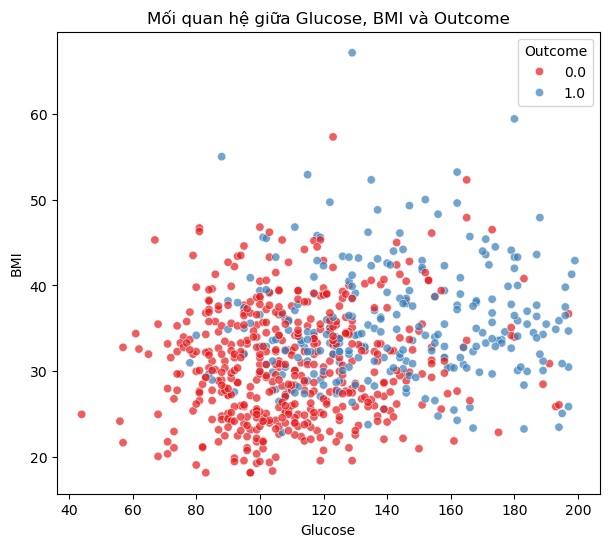

In [20]:
plt.figure(figsize=(7,6))
sns.scatterplot(x="Glucose", y="BMI", hue="Outcome", data=diabetes_data, palette="Set1", alpha=0.7)
plt.title("Mối quan hệ giữa Glucose, BMI và Outcome")
plt.show()


Nhận xét:
- Nhóm Outcome = 1 có nhiều điểm dữ liệu ở tuổi cao hơn.
- Tuổi càng lớn thì tỷ lệ mắc tiểu đường càng tăng, tuy nhiên vẫn có người trẻ mắc.

### 6.2. Phân tích đa biến

Ở đây, ta quan tâm đến mối quan hệ giữa nhiều đặc trưng với nhau và với Outcome. Các chỉ số quan trọng:
- Glucose + BMI + Outcome: kết hợp giữa đường huyết và béo phì rất có ý nghĩa trong bệnh tiểu đường.
- Age + BloodPressure + Outcome: xem mối quan hệ tuổi + huyết áp.
- Correlation giữa tất cả biến: dùng để chọn đặc trưng quan trọng cho mô hình ML.

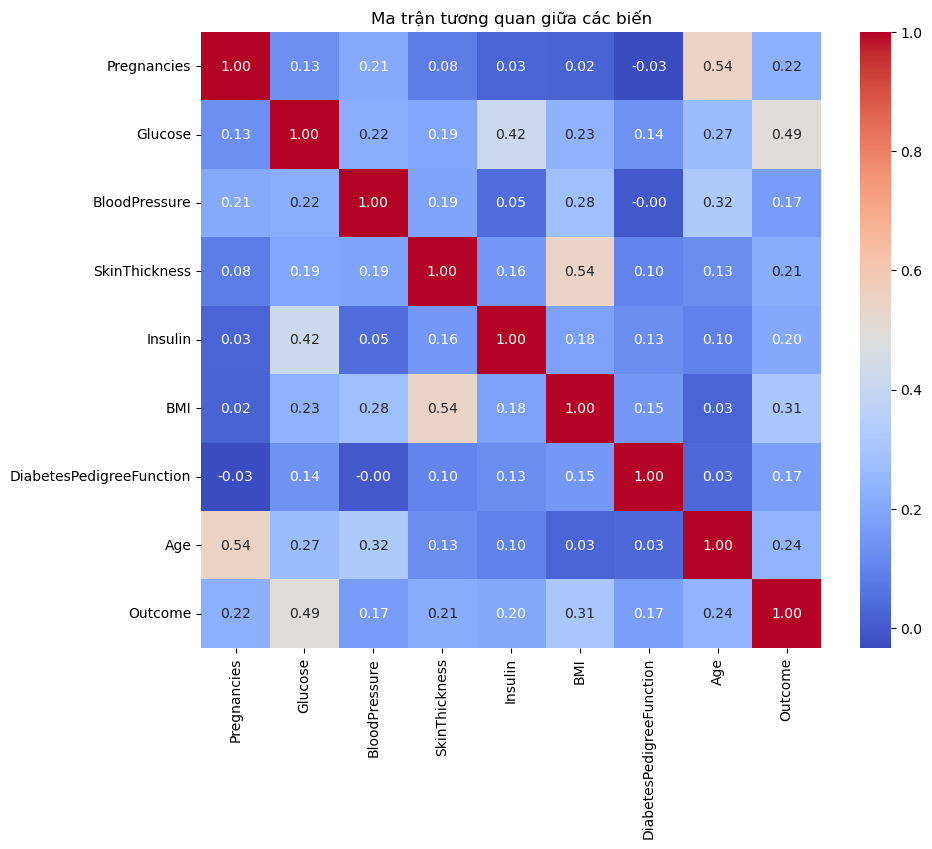

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(diabetes_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()


Nhận xét chung:
- Glucose có tương quan mạnh nhất với Outcome.
- BMI và Age cũng có mức tương quan dương với Outcome, nhưng thấp hơn.
- Một số biến như SkinThickness, Insulin có tương quan thấp với hầu hết biến khác → có thể ít giá trị trong mô hình.

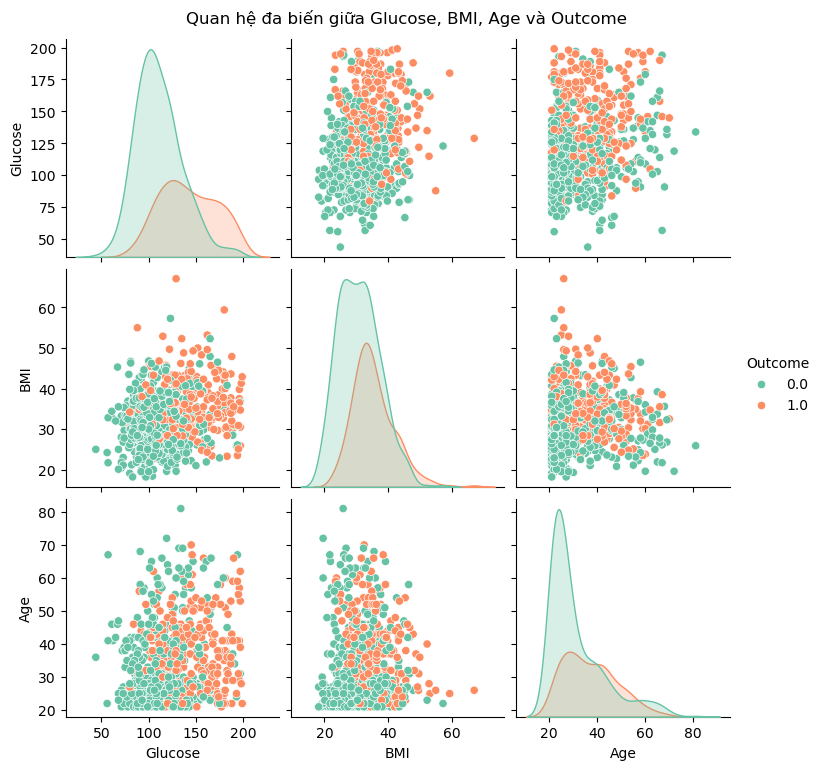

In [22]:
sns.pairplot(diabetes_data, vars=["Glucose", "BMI", "Age"], hue="Outcome", palette="Set2")
plt.suptitle("Quan hệ đa biến giữa Glucose, BMI, Age và Outcome", y=1.02)
plt.show()


Nhận xét:
- Nhóm mắc tiểu đường (Outcome = 1) tập trung ở vùng Glucose cao, BMI cao, và tuổi cao.
- Nhóm Outcome = 0 trải rộng hơn và phân tán ở vùng Glucose thấp, BMI trung bình.

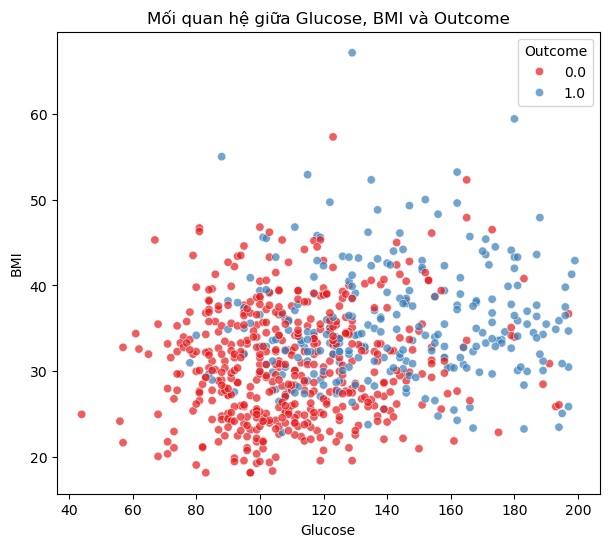

In [23]:
plt.figure(figsize=(7,6))
sns.scatterplot(x="Glucose", y="BMI", hue="Outcome", data=diabetes_data, palette="Set1", alpha=0.7)
plt.title("Mối quan hệ giữa Glucose, BMI và Outcome")
plt.show()


Nhận xét:
- Nhóm Outcome = 1 chủ yếu nằm ở góc trên phải (Glucose cao, BMI cao).
- Nhóm Outcome = 0 tập trung ở vùng Glucose thấp và BMI trung bình.
- Đây là dấu hiệu cho thấy sự kết hợp Glucose + BMI có thể là đặc trưng phân loại tốt.

## 7. Xử lý ngoại lai

Trước khi đến với bước này, chúng ta cần nhìn lại bảng phân phối mô tả đơn biến 1 chút:
* Pregnancies: Chủ yếu từ 1–6 lần, phân bố lệch phải.
* Glucose: Trung bình ~120, phân bố khá cân đối.
* Blood Pressure: Trung bình ~70–75 mmHg, biến thiên vừa phải.
* Skin Thickness: Trung bình ~25 mm, phân bố trong mức sinh lý.
* Insulin: Phân bố lệch phải mạnh, biến thiên rất lớn.
* BMI: Trung bình ~30, đa số nằm trong khoảng 27–35.
* Diabetes Pedigree Function: Trung bình ~0.47, phân bố lệch phải nhẹ.
* Age: Trung bình ~33, đa số trong nhóm 21–41 tuổi.
* Outcome: Nhóm không mắc bệnh chiếm ưu thế.


Theo như mô tả ở trên, chúng ta nhận thấy có 1 số thuộc tính có phân bố không đều, dẫn đến việc huân luyện có thể bị ảnh hưởng khi đưa vào mô hình. Chính vì thế, việc xử lý dữ lý ngoại lai (outliers) là vô cùng cần thiết và quan trọng
- Trước hết, chúng ta cần kiểm tra các dữ liệu ngoại lai, thông qua biểu đồ trực quan:

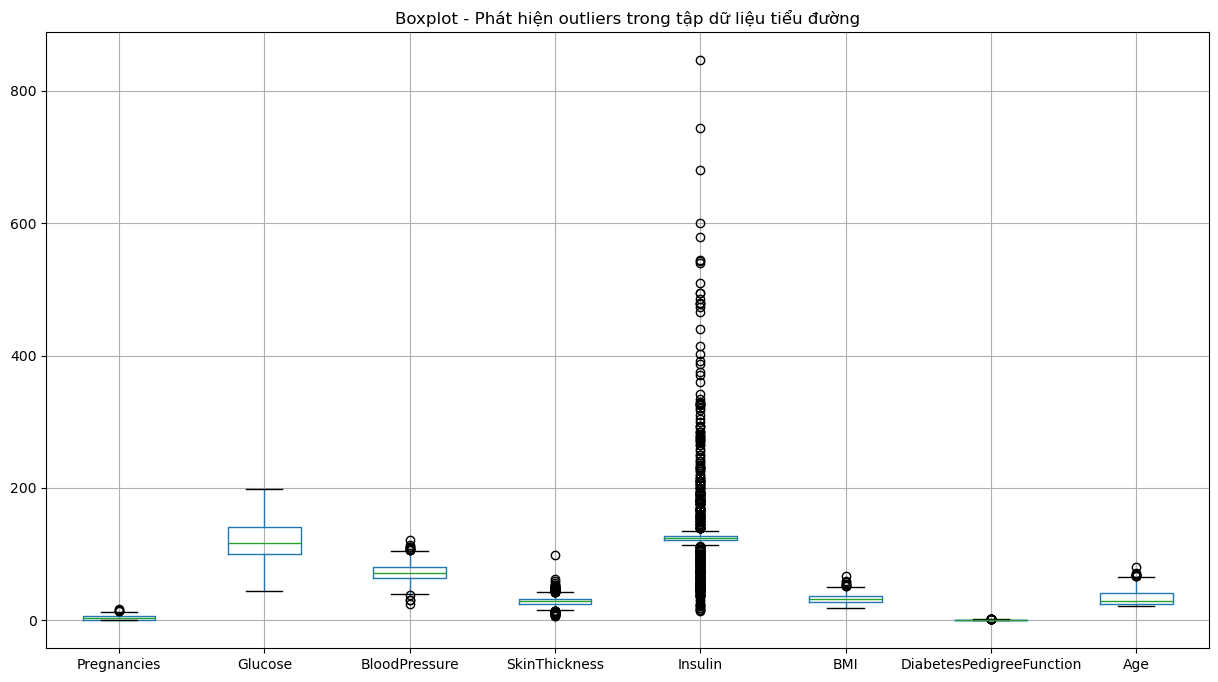

=== Pregnancies ===
Ngưỡng dưới: -6.5
Ngưỡng trên: 13.5
Số lượng outliers: 4
     Pregnancies
88          15.0
159         17.0
298         14.0
455         14.0

=== Glucose ===
Ngưỡng dưới: 39.0
Ngưỡng trên: 201.0
Số lượng outliers: 0

=== BloodPressure ===
Ngưỡng dưới: 40.0
Ngưỡng trên: 104.0
Số lượng outliers: 14
     BloodPressure
18            30.0
43           110.0
84           108.0
106          122.0
125           30.0

=== SkinThickness ===
Ngưỡng dưới: 14.5
Ngưỡng trên: 42.5
Số lượng outliers: 87
    SkinThickness
8            45.0
16           47.0
32           11.0
39           47.0
50           11.0

=== Insulin ===
Ngưỡng dưới: 112.875
Ngưỡng trên: 135.875
Số lượng outliers: 346
    Insulin
3      94.0
4     168.0
6      88.0
8     543.0
13    846.0

=== BMI ===
Ngưỡng dưới: 13.849999999999998
Ngưỡng trên: 50.25
Số lượng outliers: 8
      BMI
120  53.2
125  55.0
177  67.1
193  52.3
247  52.3

=== DiabetesPedigreeFunction ===
Ngưỡng dưới: -0.32999999999999996
Ngưỡng trên

In [24]:
# Lấy danh sách các cột số (trừ Outcome - nhãn phân loại)
numeric_cols = diabetes_data.drop(columns=["Outcome"]).columns

# --- Vẽ boxplot cho toàn bộ thuộc tính số ---
plt.figure(figsize=(15,8))
diabetes_data[numeric_cols].boxplot()
plt.title("Boxplot - Phát hiện outliers trong tập dữ liệu tiểu đường")
plt.xticks(rotation=0)
plt.show()

# --- Kiểm tra outliers bằng IQR cho từng thuộc tính ---
for col in numeric_cols:
    Q1 = diabetes_data[col].quantile(0.25)
    Q3 = diabetes_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = diabetes_data[(diabetes_data[col] < lower_bound) | (diabetes_data[col] > upper_bound)]

    print(f"=== {col} ===")
    print("Ngưỡng dưới:", lower_bound)
    print("Ngưỡng trên:", upper_bound)
    print("Số lượng outliers:", len(outliers))
    if len(outliers) > 0:
        print(outliers[[col]].head())
    print()


- Sau khi kiểm tra xong, chúng ta sẽ bắt đầu xử lý các ngoại lệ này

In [25]:
def remove_outliers(diabetes_df, columns, method='iqr', factor=1.5):
    """
    Loại bỏ các dòng có giá trị ngoại lai (outliers) theo phương pháp IQR cho các cột chỉ định.

    Args:
        df (pd.DataFrame): Bộ dữ liệu đầu vào.
        columns (list): Danh sách tên cột cần xử lý outlier.
        method (str): Phương pháp phát hiện outlier ('iqr' hoặc 'zscore').
        factor (float): Hệ số nhân cho IQR (mặc định 1.5).

    Returns:
        pd.DataFrame: Bộ dữ liệu đã loại bỏ outliers.
    """
    outlier_idx = set()
    for col in columns:
        if method == 'iqr':
            Q1 = diabetes_df[col].quantile(0.25)
            Q3 = diabetes_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - factor * IQR
            upper = Q3 + factor * IQR
            idx = diabetes_df[(diabetes_df[col] < lower) | (diabetes_df[col] > upper)].index
            outlier_idx.update(idx)
        elif method == 'zscore':
            mean = diabetes_df[col].mean()
            std = diabetes_df[col].std()
            idx = diabetes_df[(np.abs((diabetes_df[col] - mean) / std) > factor)].index
            outlier_idx.update(idx)
    return diabetes_df.drop(index=outlier_idx).reset_index(drop=True)


- Sau đó, chúng ta sẽ kiểm tra lại 1 lần nũa

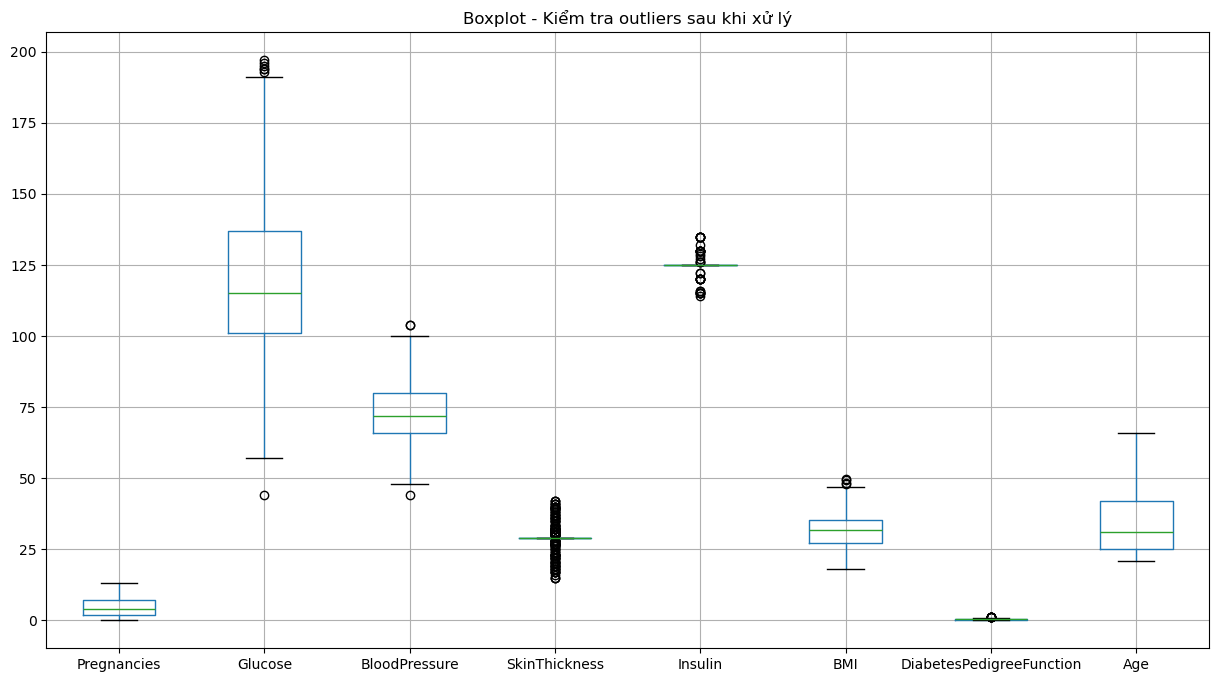

=== Pregnancies ===
Số lượng outliers còn lại: 0

=== Glucose ===
Số lượng outliers còn lại: 7

=== BloodPressure ===
Số lượng outliers còn lại: 3

=== SkinThickness ===
Số lượng outliers còn lại: 157

=== Insulin ===
Số lượng outliers còn lại: 37

=== BMI ===
Số lượng outliers còn lại: 4

=== DiabetesPedigreeFunction ===
Số lượng outliers còn lại: 9

=== Age ===
Số lượng outliers còn lại: 0



In [26]:
# Đảm bảo biến diabetes_data đã được định nghĩa trước đó
assert 'diabetes_data' in globals(), "Bạn cần chạy các cell phía trên để tạo biến diabetes_data!"

# Loại bỏ outliers bằng hàm remove_outliers đã định nghĩa
diabetes_data_clean = remove_outliers(diabetes_data, numeric_cols, method='iqr', factor=1.5)

# Kiểm tra lại outliers bằng boxplot
plt.figure(figsize=(15,8))
diabetes_data_clean[numeric_cols].boxplot()
plt.title("Boxplot - Kiểm tra outliers sau khi xử lý")
plt.xticks(rotation=0)
plt.show()

# Kiểm tra lại số lượng outliers từng cột
for col in numeric_cols:
    Q1 = diabetes_data_clean[col].quantile(0.25)
    Q3 = diabetes_data_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = diabetes_data_clean[(diabetes_data_clean[col] < lower_bound) | (diabetes_data_clean[col] > upper_bound)]

    print(f"=== {col} ===")
    print("Số lượng outliers còn lại:", len(outliers))
    print()


## Kết thúc